<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br><br><br>

# Listed Volatility and Variance Derivatives

**Dr. Yves J. Hilpisch &mdash; Wiley Finance (2016)**

<img src="http://hilpisch.com/images/lvvd_cover.png" alt="Derivatives Analytics with Python" width="30%" align="left" border="0">

# Valuing Volatility Derivatives

## Introduction

## The Valuation Framework

In [1]:
import math
## model parameters
v0 = 17.5  # initial level of volatility index
kappa = 0.1  # speed of mean reversion
theta = 20.0  # long-term index level
sigma = 2.0  # volatility of volatility
zeta = 0.0  # factor of the expected volatility risk premium
r = 0.01  # risk-free short rate

## option parameters
K = 20.0  # strike
T = 1.0  # time horizon in year fractions

## The Futures Pricing Formula

In [2]:
import sys
sys.path.append('scripts/')

In [3]:
from srd_functions import *
futures_price(v0, kappa, theta, zeta, T)

17.7379064549101

In [4]:
import numpy as np
import seaborn as sns; sns.set()
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
import matplotlib.pyplot as plt
%matplotlib inline
maturities = np.linspace(0, 2, 24)
futures_prices = [futures_price(v0, kappa, theta, zeta, T)
                 for T in maturities]

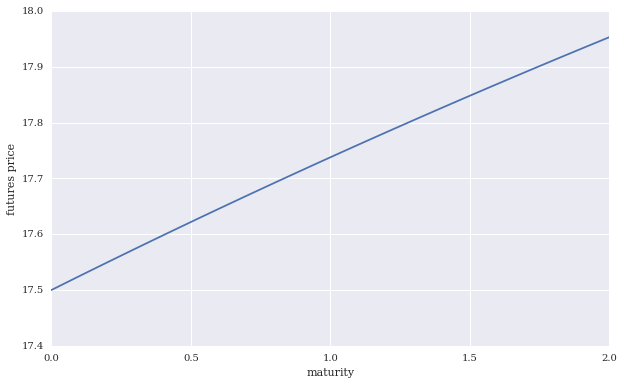

In [5]:
plt.figure(figsize=(10, 6));
plt.plot(maturities, futures_prices);
plt.xlabel('maturity');
plt.ylabel('futures price');

## The Option Pricing Formula

In [6]:
call_price(v0, kappa, theta, sigma, zeta, T, r, K)

3.3682878822902369

In [7]:
import numpy as np
import pandas as pd
option_values = []
strikes = np.linspace(15, 25)
option_values = [call_price(v0, kappa, theta, sigma, zeta, T, r, k)
                 for k in strikes]
data = pd.DataFrame(option_values, index=strikes,
                    columns=['call values', ])
data.index.name = 'strike'

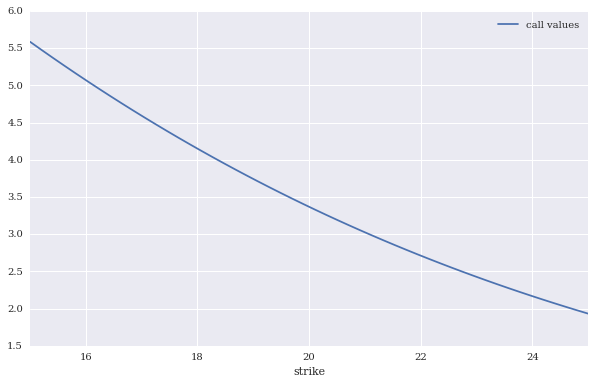

In [8]:
data.plot(figsize=(10, 6));

## Monte Carlo Simulation

In [9]:
## simulation parameters
M = 50  # time steps
I = 20000  # number of MCS paths

In [10]:
paths = generate_paths(v0, kappa, theta, sigma, T, M, I)

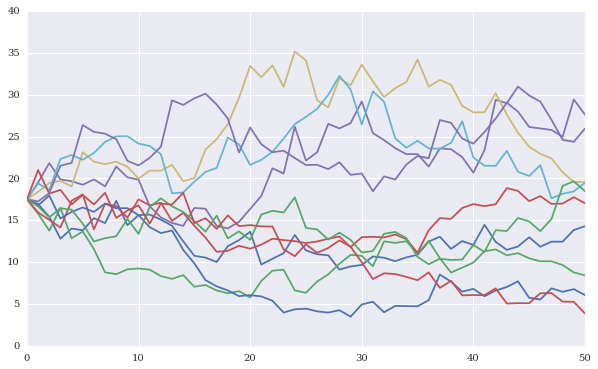

In [11]:
pd.DataFrame(paths[:, :10]).plot(legend=False, figsize=(10, 6));

In [12]:
call_estimator(v0, kappa, theta, sigma, T, r, K, M, I)

3.3971083435069782

In [13]:
%%time
estimates = []
for k in strikes:
    estimates.append(call_estimator(v0, kappa, theta, sigma,
                                    T, r, k, M, I))
data['estimates'] = estimates

CPU times: user 6.62 s, sys: 136 ms, total: 6.76 s
Wall time: 6.81 s


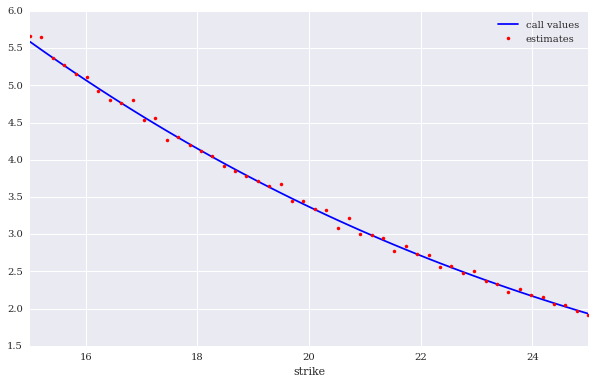

In [14]:
data.plot(style=['b', 'r.'], figsize=(10, 6));

## Automated Monte Carlo Tests

### The Automated Testing

### The Storage Functions

### The Results

In [15]:
filename = 'data/simulation_results.h5'
from srd_simulation_results import plot_error_ratio

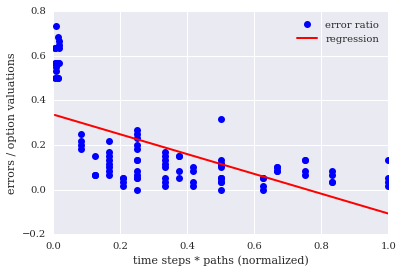

In [16]:
plot_error_ratio(filename)

In [17]:
import pandas as pd
h5 = pd.HDFStore(filename, 'r')
data = h5['sim_results']
h5.close()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 19 columns):
ab_val_err     96 non-null float64
abs_tol        96 non-null float64
anti_paths     96 non-null bool
av_val_err     96 non-null float64
end_date       96 non-null datetime64[ns]
error_ratio    96 non-null float64
errors         96 non-null int64
mo_match       96 non-null bool
opt_prices     96 non-null float64
paths          96 non-null int64
rel_tol        96 non-null float64
runs           96 non-null int64
seed           96 non-null int64
sim_name       96 non-null object
start_date     96 non-null datetime64[ns]
time_min       96 non-null float64
time_opt       96 non-null float64
time_sec       96 non-null float64
time_steps     96 non-null int64
dtypes: bool(2), datetime64[ns](2), float64(9), int64(5), object(1)
memory usage: 13.7+ KB


In [18]:
data.groupby(['mo_match']).mean()[['error_ratio']]

,error_ratio
mo_match,
False,0.193750
True,0.169097


In [19]:
data.groupby(['mo_match', 'anti_paths']).mean()[['error_ratio', 'errors']]

error_ratio     errors
mo_match anti_paths                        
False    False          0.206944  12.416667
         True           0.180556  10.833333
True     False          0.159028   9.541667
         True           0.179167  10.750000

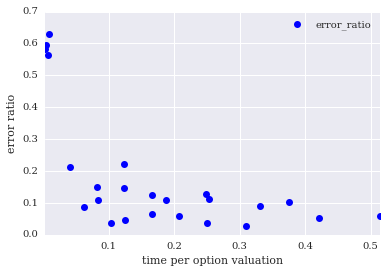

In [20]:
df = data.groupby(['time_steps', 'paths']).mean()[['error_ratio', 'time_opt']]
df.plot(x='time_opt', y='error_ratio', style='bo');
plt.xlabel('time per option valuation');
# @savefig gl96_error_ratio_time.pdf
plt.ylabel('error ratio');

## Model Calibration

### The Option Quotes

In [21]:
import pandas as pd
path = 'data/'
h5 = pd.HDFStore(path + 'vstoxx_option_quotes.h5', 'r')
option_quotes = h5['option_quotes']

In [22]:
option_quotes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 46219 to 46365
Data columns (total 8 columns):
DATE         98 non-null datetime64[ns]
EXP_YEAR     98 non-null int64
EXP_MONTH    98 non-null int64
TYPE         98 non-null object
STRIKE       98 non-null float64
PRICE        98 non-null float64
MATURITY     98 non-null datetime64[ns]
TTM          98 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(1)
memory usage: 6.9+ KB


In [23]:
option_quotes.iloc[25:35]

,DATE,EXP_YEAR,EXP_MONTH,TYPE,STRIKE,PRICE,MATURITY,TTM
46244,2014-03-31,2014,5,C,26.0,0.60,2014-05-16,0.126
46245,2014-03-31,2014,5,C,27.0,0.50,2014-05-16,0.126
46246,2014-03-31,2014,5,C,28.0,0.45,2014-05-16,0.126
46247,2014-03-31,2014,5,C,29.0,0.40,2014-05-16,0.126
46248,2014-03-31,2014,5,C,30.0,0.35,2014-05-16,0.126
46249,2014-03-31,2014,5,C,32.5,0.25,2014-05-16,0.126
46250,2014-03-31,2014,5,C,35.0,0.20,2014-05-16,0.126
46251,2014-03-31,2014,5,C,37.5,0.15,2014-05-16,0.126
46252,2014-03-31,2014,5,C,40.0,0.10,2014-05-16,0.126
46253,2014-03-31,2014,5,C,42.5,0.10,2014-05-16,0.126


### The Calibration Procedure

### The Calibration Results

In [24]:
from srd_model_calibration import *
option_data = read_select_quotes()

In [25]:
%time opt = model_calibration(option_data, rel=False, mat='2014-05-16')

 kappa  theta  sigma         MSE
 5.000 10.000  1.000     7.78606
 6.000 12.500  9.000     0.23173
 7.000 16.250  9.000     0.40860
 8.000 20.000  9.000     2.54160
 9.000 23.750  9.000     9.70521
10.000 27.500  9.000    26.90758
12.000 10.000  9.000     3.75104
13.000 13.750  9.000     1.50070
14.000 17.500  9.000     0.06953
15.000 21.250  9.000     3.39340
16.000 25.000  9.000    18.12298
17.000 28.750  9.000    51.74883
19.000 11.250  9.000     5.14886
20.000 15.000  9.000     1.96050
 kappa  theta  sigma         MSE
15.000 18.750  7.000     0.01356
16.381 19.112  6.613     0.00834
27.671 18.969  8.513     0.00831
33.461 18.950  9.343     0.00831
33.457 18.950  9.342     0.00831
Optimization terminated successfully.
         Current function value: 0.008311
         Iterations: 247
         Function evaluations: 450
CPU times: user 4.17 s, sys: 161 ms, total: 4.33 s
Wall time: 4.24 s


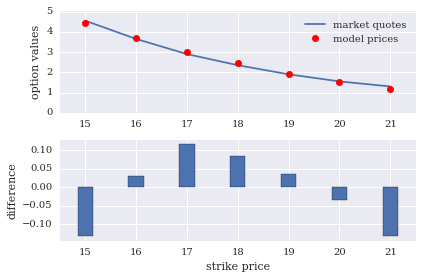

In [26]:
plot_calibration_results(opt)

In [27]:
%time opt = model_calibration(option_data, rel=True, mat='2014-07-18')

 kappa  theta  sigma         MSE
 5.000 10.000  1.000     1.00000
 6.000 12.500  9.000     0.12866
 7.000 16.250  9.000     0.01167
 8.000 20.000  9.000     0.18546
 9.000 23.750  9.000     1.20473
10.000 27.500  9.000     3.86826
12.000 10.000  9.000     0.73475
13.000 13.750  9.000     0.41208
14.000 17.500  9.000     0.05791
15.000 21.250  9.000     0.15684
16.000 25.000  9.000     1.57671
17.000 28.750  9.000     5.26237
19.000 11.250  9.000     0.81013
20.000 15.000  9.000     0.45062
 kappa  theta  sigma         MSE
 5.000 20.000  5.000     0.00051
 5.848 19.927  5.295     0.00050
11.500 19.608  7.260     0.00049
12.731 19.585  7.638     0.00049
12.732 19.585  7.638     0.00049
Optimization terminated successfully.
         Current function value: 0.000495
         Iterations: 252
         Function evaluations: 450
CPU times: user 4.14 s, sys: 166 ms, total: 4.31 s
Wall time: 4.21 s


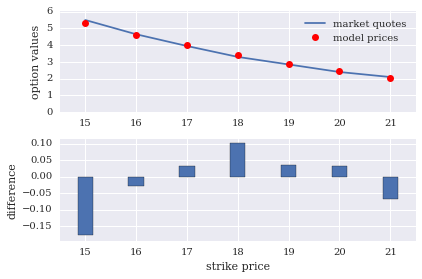

In [28]:
plot_calibration_results(opt)

## Conclusions

## Python Scripts

### srd_functions.py

### srd_simulation_analysis.py

### srd_simulation_results.py

### srd_model_calibration.py

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:team@tpq.io">team@tpq.io</a>

**DX Analytics** |
<a href="http://dx-analytics.com">http://dx-analytics.com</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance Books** |
<a href="http://books.tpq.io" target="_blank">http://books.tpq.io</a>

**Python for Finance Training** |
<a href="http://training.tpq.io" target="_blank">http://training.tpq.io</a>